In [814]:
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


In [822]:
!pwd

/Users/katiesohn


In [480]:
pd.read_csv('~/Documents/Bootcamp/zocdoc/zocdocdoctors_clean.csv')


,board_certs,doctor,doctor_type,education,gender,individual_rating,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards
0,NaN,Dr. Sam Na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dr. Alexandra Yungelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Dr. Nirooch Suebsanguan (Nathan Sang),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Dr. Svetlana Monastyrskaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Dr. Mee Kyung (Michelle) Han,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Dr. Priya Sekhri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Dr. Steven Ritholtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Dr. Matthew Hausserman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Dr. Azar Boujaran-Ghomi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Dr. Brian Quinn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [481]:
#zocdocs_df = pd.read_csv('~/Documents/Bootcamp/zocdoc/zocdocdoctors_clean.csv', converters={'languages': clean}) <--
#way to pass the languages column as strings while reading in the csv 
zocdocs_df = pd.read_csv('~/Documents/Bootcamp/zocdoc/zocdocdoctors_clean.csv')
zocdocs_df

,board_certs,doctor,doctor_type,education,gender,individual_rating,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards
0,NaN,Dr. Sam Na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dr. Alexandra Yungelson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Dr. Nirooch Suebsanguan (Nathan Sang),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Dr. Svetlana Monastyrskaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Dr. Mee Kyung (Michelle) Han,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Dr. Priya Sekhri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Dr. Steven Ritholtz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Dr. Matthew Hausserman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Dr. Azar Boujaran-Ghomi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Dr. Brian Quinn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [482]:
zocdocs_df2=zocdocs_df.dropna(subset=['doctor_type','education','board_certs','gender','individual_rating','npi','overall_patient_ratings','overall_rating','practice','street_address','city_state','zoc_awards'], how='all')
zocdocs_df2=zocdocs_df2.drop_duplicates()



In [483]:

zocdocs_df2.dtypes
zocdocs_df2['overall_patient_ratings'] = zocdocs_df2['overall_patient_ratings'].str.strip('[]')


,board_certs,doctor,doctor_type,education,gender,individual_rating,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,NaN,English,1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,NaN,"English,French",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","icon-speedy-response,icon-scheduling-hero"
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,NaN,English,1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",icon-scheduling-hero
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,NaN,"English,French,Romanian",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","icon-see-you-again,icon-speedy-response,icon-s..."
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,NaN,"English,Spanish",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","icon-see-you-again,icon-rapid-registration,ico..."
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,NaN,"English,Russian",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","icon-see-you-again,icon-speedy-response"
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,NaN,English,1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","icon-see-you-again,icon-rapid-registration,ico..."
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,NaN,"Chinese (Mandarin),English",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","icon-see-you-again,icon-rapid-registration,ico..."
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,NaN,"Chinese (Cantonese),Chinese (Mandarin),English",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","icon-see-you-again,icon-speedy-response"
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,NaN,"Chinese (Mandarin),Chinese (Wenzhounese),English",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","icon-see-you-again,icon-rapid-registration,ico..."


In [484]:
zoc_df3=zocdocs_df2.join(zocdocs_df2['overall_patient_ratings'].str.split(',', 2, expand=True).rename(columns={0:'overall_p_rating', 1:'wait_rating', 2:'bedside_rating'}))

In [485]:
zoc_df3.drop('overall_p_rating', axis=1, inplace=True)
zoc_df3.drop('individual_rating', axis=1, inplace=True)
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,English,1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"English,French",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","icon-speedy-response,icon-scheduling-hero",5,4.5
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,English,1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",icon-scheduling-hero,5,5
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"English,French,Romanian",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","icon-see-you-again,icon-speedy-response,icon-s...",5,5
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"English,Spanish",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","icon-see-you-again,icon-rapid-registration,ico...",4.5,5
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"English,Russian",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","icon-see-you-again,icon-speedy-response",4.5,5
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,English,1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","icon-see-you-again,icon-rapid-registration,ico...",4.5,4.5
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"Chinese (Mandarin),English",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","icon-see-you-again,icon-rapid-registration,ico...",3,4.5
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"Chinese (Cantonese),Chinese (Mandarin),English",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","icon-see-you-again,icon-speedy-response",5,5
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"Chinese (Mandarin),Chinese (Wenzhounese),English",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","icon-see-you-again,icon-rapid-registration,ico...",5,5


In [794]:
#zoc_df3['languages'].isnull() == False

In [486]:
def clean(seq_string):
    return list(map(str, seq_string.split(',')))

mask = zoc_df3['languages'].isnull() == False
zoc_df3.loc[mask,'languages'] = zoc_df3.loc[mask,'languages'].apply(lambda x: clean(x))


In [418]:
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,English,1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"English,French",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","icon-speedy-response,icon-scheduling-hero",5,4.5
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,English,1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",icon-scheduling-hero,5,5
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"English,French,Romanian",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","icon-see-you-again,icon-speedy-response,icon-s...",5,5
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"English,Spanish",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","icon-see-you-again,icon-rapid-registration,ico...",4.5,5
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"English,Russian",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","icon-see-you-again,icon-speedy-response",4.5,5
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,English,1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","icon-see-you-again,icon-rapid-registration,ico...",4.5,4.5
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"Chinese (Mandarin),English",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","icon-see-you-again,icon-rapid-registration,ico...",3,4.5
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"Chinese (Cantonese),Chinese (Mandarin),English",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","icon-see-you-again,icon-speedy-response",5,5
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"Chinese (Mandarin),Chinese (Wenzhounese),English",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","icon-see-you-again,icon-rapid-registration,ico...",5,5


In [795]:
#zoc_df4=explode(zoc_df3, ['languages'] , fill_value='')

In [487]:
zoc_df3['lang_len'] = zoc_df3['languages'].str.len()
zoc_df3.languages.dtype



dtype('O')

In [488]:
mask2 = zoc_df3['zoc_awards'].isnull() == False
zoc_df3.loc[mask2,'zoc_awards'] = zoc_df3.loc[mask2,'zoc_awards'].apply(lambda x: clean(x))

In [489]:
zoc_df3['awards_len'] = zoc_df3['zoc_awards'].str.len()
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,1.0,NaN
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5,4.5,2.0,2.0
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5,5,1.0,1.0
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5,5,3.0,3.0
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5,2.0,3.0
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5,2.0,2.0
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3,4.5,2.0,3.0
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5,5,3.0,2.0
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5,5,3.0,3.0


In [490]:
zoc_df3['wait_rating']=pd.to_numeric(zoc_df3.wait_rating)
zoc_df3['bedside_rating']=pd.to_numeric(zoc_df3.bedside_rating)
zoc_df3['overall_rating']=pd.to_numeric(zoc_df3.overall_rating)
zoc_df3.wait_rating.dtype
zoc_df3.bedside_rating.dtype
zoc_df3.overall_rating.dtype

dtype('float64')

In [353]:
zoc_df3.city_state.dtype

dtype('O')

In [491]:
#df1.loc[:,'f'] = p.Series(np.random.randn(sLength), index=df1.index)
zoc_df3.loc[zoc_df3['city_state'].str.contains('10011|10003|10026|10027|10030|10037|10039|10001|10018|10019|10020| \
10036|10029|10035|10010|10016|10017|10022|10012|10013|10014|10004|10005|10006|10007|10038|10280|10036|10176|10282|10122| \
10002|10009|10021|10028|10044|10065|10075|10128|10023|10024|10025|10031|10032|10033|10034|10040|10279|10002|10069|10175'),'boro']='Manhattan'
zoc_df3.loc[zoc_df3['city_state'].str.contains('11361|11362|11363|11364|11354|11355|11356|11357|11358|11359|11360 \
11365|11366|11367|11412|11423|11432|11433|11434|11435|11436|11101|11102|11103|11104|11105|11106|11374|11375|11379| \
11385|11691|11692|11693|11694|11695|11697|11004|11005|11411|11413|11422|11426|11427|11428|11429|11414|11415|11416|11417|11418|11419| \
11420|11421|11368|11369|11370|11372|11373|11377|11378|11360|11385'),'boro']='Queens'
zoc_df3.loc[zoc_df3['city_state'].str.contains('10453|10457|10460|10458|10467|10468|10451|10452|10456|10454|10455|10459|10474| \
10463|10471|10466|10469|10470|10475|10461|10462|10464|10465|10472|10473'),'boro']='Bronx'
zoc_df3.loc[zoc_df3['city_state'].str.contains('11212|11213|11216|11233|11238|11209|11214|11228|11204|11218| \
11219|11230|11234|11236|11239|11223|11224|11229|11235|11201|11205|11215|11217|11231|11203|11210|11225|11226| \
11207|11208|11211|11222|11220|11232|11206|11221|11237|11243|11242|11249|11219'),'boro']='Brooklyn'
zoc_df3.loc[zoc_df3['city_state'].str.contains('10302|10303|10310|10306|10307|10308|10309|10312|10301|10304|10305| \
10314'),'boro']='Staten Island' 
zoc_df3.loc[zoc_df3['city_state'].str.contains('NJ'),'boro']='New Jersey'
#f_recs[f_recs['Behavior'].str.contains("nt|nv", na=False)]
#titanic.loc[titanic['Name'].str.contains('Charles'), 'namest'] = 'Ch'
#zoc_df3["boro"][zoc_df3['city_state'].str.contains("10011")] = "Manhattan"
zoc_df3


,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn


In [560]:
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Psychiatrist'),'dr_class']='Psychiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Psychotherapist'),'dr_class']='Psychotherapist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Psychologist'),'dr_class']='Psychologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Neurologist'),'dr_class']='Neurologist'
#zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Neurologist'),'dr_class']='Neurologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Gastroenterologist'),'dr_class']='Gastroenterologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Dentist|Orthodontist'),'dr_class']='Dental'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Practitioner'),'dr_class']='Nurse Practitioner'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Cardiologist'),'dr_class']='Cardiologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Physical'),'dr_class']='Physical Therapist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Chiropractor|Spine'),'dr_class']='Chiropractor'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Podiatrist'),'dr_class']='Podiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Dermatologist'),'dr_class']='Dermatologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('OB-GYN|Urogynecologist|Midwife'),'dr_class']='OB-GYN'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Surgeon'),'dr_class']='Surgeon'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Physiatrist|Sports'),'dr_class']='Physiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Ear, Nose'),'dr_class']='Ear, Nose, & Throat Doctor'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Optometrist'),'dr_class']='Optometrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Primary Care|Pediatrician|Family|Pediatric'),'dr_class']='Primary Care Doctor'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Ophthalmologist|Optometrist'),'dr_class']='Eye Treatment'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Urologist|Optometrist'),'dr_class']='Eye Treatment'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Podiatrist'),'dr_class']='Podiatrist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Internist'),'dr_class']='Internist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Radiologist'),'dr_class']='Radiologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Urgent'),'dr_class']='Urgent Care'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Pain|Anesthesiologist'),'dr_class']='Urgent Care'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Oncologist'),'dr_class']='Oncologist'
zoc_df3.loc[zoc_df3['doctor_type'].str.contains('Pulmonologist|Assistant|Audiologist|Endocrinologist|Allergist'),'dr_class']='Misc'
zoc_df3
#zoc_df3


,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,...,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,gender2,boro2,dr_class
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD",...,"New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan,1,1,Psychotherapist
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,...,"New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,2,1,Psychotherapist
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,...,"Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,2,1,Psychologist
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.",...,"New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey,1,6,Psychiatrist
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,...,"New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,2,1,Internist
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,...,"Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,2,1,Dental
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,...,"Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,2,2,Neurologist
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,...,"New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn,1,2,OB-GYN
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,...,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,2,1,Physiatrist
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,...,"Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn,1,2,Primary Care Doctor


In [502]:
zoc_df3.loc[zoc_df3['gender'].str.contains('Female'),'gender2']=1
zoc_df3.loc[zoc_df3['gender'].str.contains('Male'),'gender2']=2

In [501]:
zoc_df3.loc[zoc_df3['boro'].str.contains('Manhattan'),'boro2']=1
zoc_df3.loc[zoc_df3['boro'].str.contains('Brooklyn'),'boro2']=2
zoc_df3.loc[zoc_df3['boro'].str.contains('Queens'),'boro2']=3
zoc_df3.loc[zoc_df3['boro'].str.contains('Staten Island'),'boro2']=4
zoc_df3.loc[zoc_df3['boro'].str.contains('Bronx'),'boro2']=5
zoc_df3.loc[zoc_df3['boro'].str.contains('New Jersey'),'boro2']=6

In [698]:
zoc_df3.gender2=zoc_df3.gender2.astype(dtype=int)
zoc_df3.boro2=zoc_df3.boro2.astype(dtype=int)
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,...,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,gender2,boro2,dr_class
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD",...,"New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan,1,1,Psychotherapist
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,...,"New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,2,1,Psychotherapist
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,...,"Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,2,1,Psychologist
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.",...,"New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey,1,6,Psychiatrist
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,...,"New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,2,1,Internist
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,...,"Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,2,1,Dental
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,...,"Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,2,2,Neurologist
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,...,"New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn,1,2,OB-GYN
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,...,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,2,1,Physiatrist
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,...,"Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn,1,2,Primary Care Doctor


In [705]:
#zoc_df3.groupby(['boro'])['boro'].agg("count")


conditions = [
    (zoc_df3['boro'] == 'Bronx'),
    (zoc_df3['boro'] == 'Brooklyn'),
    (zoc_df3['boro'] == 'Manhattan'),
    (zoc_df3['boro'] == 'New Jersey'),
    (zoc_df3['boro'] == 'Queens'),
    (zoc_df3['boro'] == 'Staten Island')]
choices = [21,265,652,105,70,8]
zoc_df3['boro_count'] = np.select(conditions, choices, default='black')
zoc_df3

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,...,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,gender2,boro2,dr_class,boro_count
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD",...,NaN,4.5,4.5,1.0,NaN,Manhattan,1,1,Psychotherapist,652
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,...,"[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,2,1,Psychotherapist,652
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,...,[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,2,1,Psychologist,652
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.",...,"[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey,1,6,Psychiatrist,105
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,...,"[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,2,1,Internist,652
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,...,"[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,2,1,Dental,652
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,...,"[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,2,2,Neurologist,265
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,...,"[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn,1,2,OB-GYN,265
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,...,"[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,2,1,Physiatrist,652
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,...,"[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn,1,2,Primary Care Doctor,265


In [709]:
zoc_df3.boro_count=zoc_df3.boro_count.astype(dtype=int)

In [746]:
zoc_df3 = zoc_df3.reset_index()

In [751]:
zoc_df3.head()

,index,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,...,wait_rating,bedside_rating,lang_len,awards_len,boro,gender2,boro2,dr_class,boro_count,Overall_rating_percents
0,157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,NaN,Manhattan,1,1,Psychotherapist,652,0.690184
1,159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,...,5.0,4.5,2.0,2.0,Manhattan,2,1,Psychotherapist,652,0.690184
2,161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,...,5.0,5.0,1.0,1.0,Manhattan,2,1,Psychologist,652,0.766871
3,162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,New Jersey,1,6,Psychiatrist,105,4.761905
4,165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,3.0,Manhattan,2,1,Internist,652,0.766871


In [773]:
overall_rating_percents

,overall_rating,boro,boro_count,doctor,Percents
0,2.5,Manhattan,652,1,0.153374
1,3.5,Brooklyn,265,3,1.132075
2,3.5,Manhattan,652,1,0.153374
3,3.5,Queens,70,2,2.857143
4,4.0,Bronx,21,1,4.761905
5,4.0,Brooklyn,265,28,10.566038
6,4.0,Manhattan,652,14,2.147239
7,4.0,New Jersey,105,9,8.571429
8,4.0,Queens,70,4,5.714286
9,4.0,Staten Island,8,2,25.000000


In [770]:
#zoc_df3.groupby(['boro'])['boro'].agg("count")
#zoc_df3['Overall_rating_percents'] = zoc_df3.groupby(['boro'], group_keys=False).apply(lambda g: g.overall_rating/g.boro_count*100)

#zoc_df3
overall_rating_percents=zoc_df3.groupby(['overall_rating','boro','boro_count']).agg({'doctor':"count"}).reset_index()
overall_rating_percents=pd.DataFrame(overall_rating_percents)
overall_rating_percents['Percents']=overall_rating_percents['doctor']/overall_rating_percents['boro_count']*100

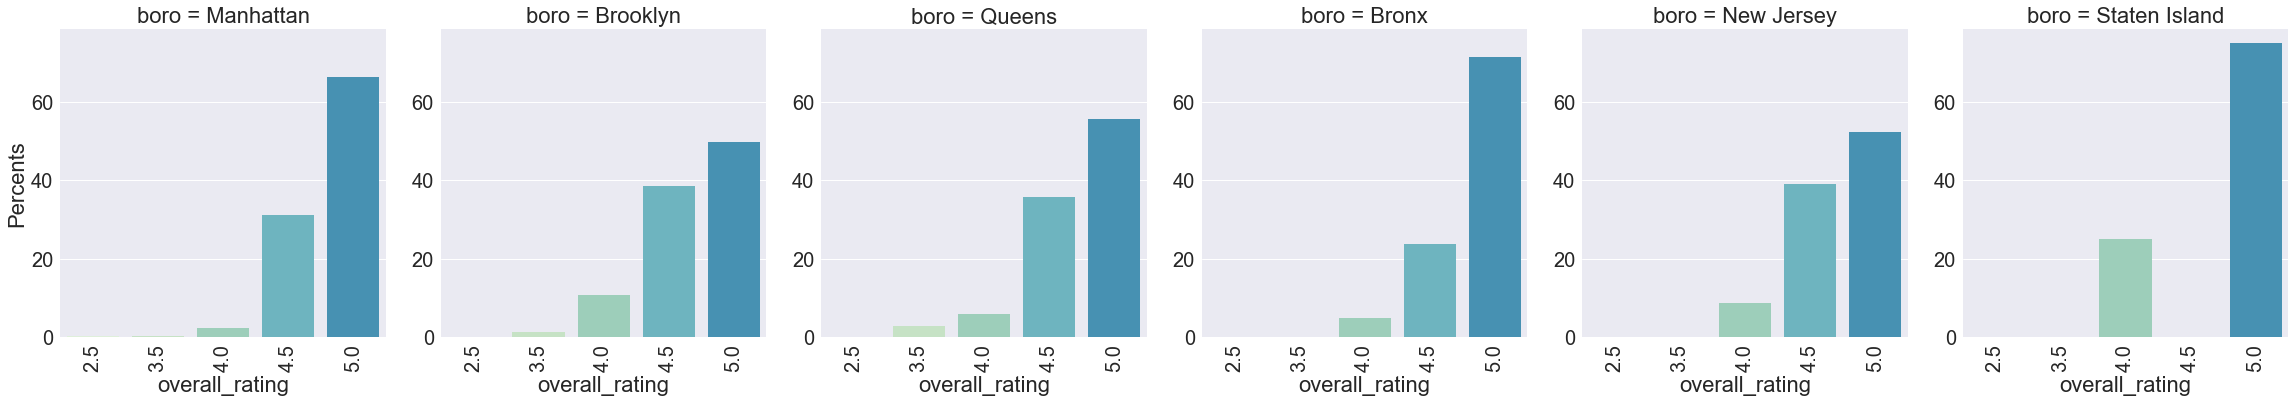

In [816]:
h = sns.factorplot(x="overall_rating", y="Percents", col="boro", data=overall_rating_percents, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)
sns.set(font_scale=2.5)

In [819]:
bedside_rating_percents=zoc_df3.groupby(['bedside_rating','boro','boro_count']).agg({'doctor':"count"}).reset_index()
bedside_rating_percents=pd.DataFrame(bedside_rating_percents)
bedside_rating_percents['Percents']=bedside_rating_percents['doctor']/bedside_rating_percents['boro_count']*100

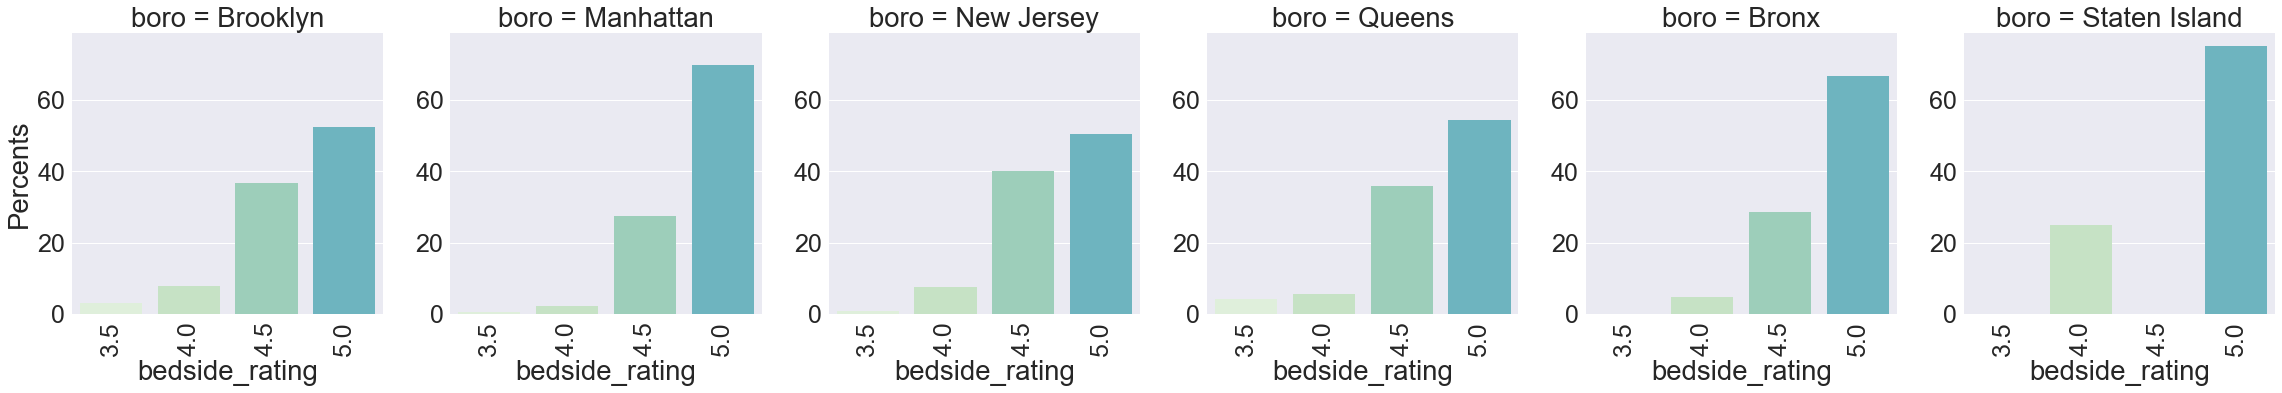

In [821]:
h = sns.factorplot(x="bedside_rating", y="Percents", col="boro", data=bedside_rating_percents, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)
sns.set(font_scale=2.5)

In [783]:
wait_rating_percents=zoc_df3.groupby(['wait_rating','boro','boro_count']).agg({'doctor':"count"}).reset_index()
wait_rating_percents=pd.DataFrame(wait_rating_percents)
wait_rating_percents['Percents']=wait_rating_percents['doctor']/wait_rating_percents['boro_count']*100

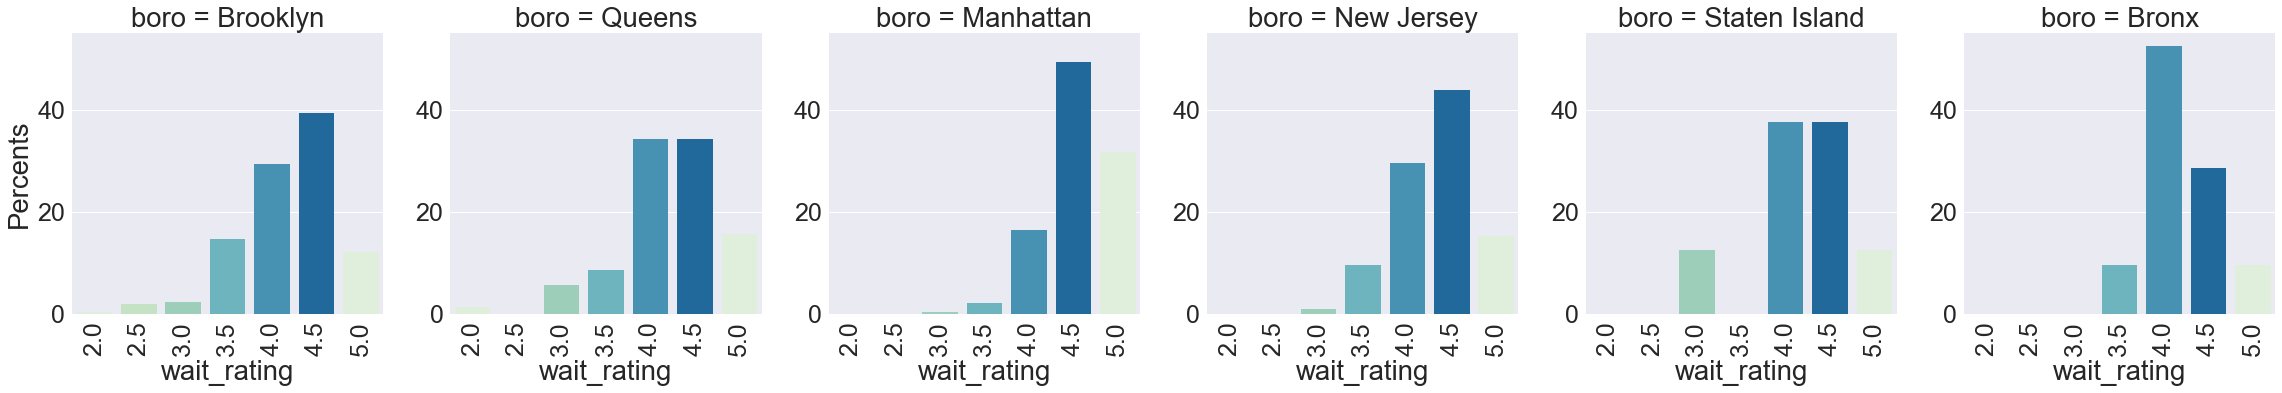

In [818]:
h = sns.factorplot(x="wait_rating", y="Percents", col="boro", data=wait_rating_percents, kind="bar", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

In [330]:
from collections import Counter
Counter(zoc_df3.doctor_type)

Counter({'Addiction Specialist, Psychiatrist': 5,
         'Adolescent Medicine Specialist, Family Physician': 1,
         'Adult Nurse Practitioner, Nurse Practitioner': 1,
         'Adult Psychiatric & Mental Health Nurse Practitioner, Nurse Practitioner': 1,
         'Allergist, Immunologist': 1,
         'Allergist, Pediatrician': 1,
         'Anesthesiologist, Pain Management Specialist': 4,
         'Audiologist': 1,
         'Bariatric Surgeon, Surgeon': 1,
         'Breast Surgeon, Plastic Surgeon': 1,
         'Breast Surgeon, Surgeon, Endocrine Surgeon': 1,
         'Cardiologist': 23,
         'Cardiologist, Cardiac Electrophysiologist, Internist': 1,
         'Cardiologist, Internist': 6,
         'Cardiologist, Primary Care Doctor': 1,
         'Cardiologist, Primary Care Doctor, Internist': 3,
         'Cardiothoracic Surgeon, Surgeon': 1,
         'Child and Adolescent Psychiatrist, Psychiatrist': 12,
         'Child and Adolescent Psychiatrist, Psychiatrist, Addiction S

In [314]:
zoclangcomplete_df = zoc_df3[zoc_df3.languages.isnull()==False]
zoclangcomplete_df  #giving me a dataframe where all items in languages is complete 
#null_data = df[df.isnull().any(axis=1)]
zoclangcomplete2_df = zoclangcomplete_df.groupby('doctor').languages.apply(lambda x: pd.DataFrame(x.values[0])).reset_index().drop('level_1', axis = 1)

zoclangcomplete2_df.columns = ['doctor','languages']
zoclangcomplete2_df

#zoclangcomplete_df=zoclangcomplete_df.reset_index().set_index(['doctor','languages'])

,doctor,languages
0,"Abby Fashakin, FNP, MSN",English
1,"Abby Fashakin, FNP, MSN",Yoruba
2,"Allison Gill, PT",English
3,"Amir Rand, PT, DPT",English
4,"Andrew Eisen, DPT",English
5,"Angela M Godwin, NP",English
6,"Anthony Freire, LMHC",English
7,"Anthony Freire, LMHC",Portuguese
8,"Ashton Frulla, NP",English
9,"Barbara Tint, LCSW, PhD",English


In [420]:
zoclangcomplete_df = zoc_df3[zoc_df3.languages.isnull()==False]
zoclangcomplete_df

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,boro
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,English,1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,Manhattan
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"English,French",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","icon-speedy-response,icon-scheduling-hero",5,4.5,Manhattan
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,English,1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",icon-scheduling-hero,5,5,Manhattan
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"English,French,Romanian",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","icon-see-you-again,icon-speedy-response,icon-s...",5,5,New Jersey
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"English,Spanish",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","icon-see-you-again,icon-rapid-registration,ico...",4.5,5,Manhattan
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"English,Russian",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","icon-see-you-again,icon-speedy-response",4.5,5,Manhattan
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,English,1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","icon-see-you-again,icon-rapid-registration,ico...",4.5,4.5,Brooklyn
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"Chinese (Mandarin),English",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","icon-see-you-again,icon-rapid-registration,ico...",3,4.5,Brooklyn
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"Chinese (Cantonese),Chinese (Mandarin),English",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","icon-see-you-again,icon-speedy-response",5,5,Manhattan
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"Chinese (Mandarin),Chinese (Wenzhounese),English",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","icon-see-you-again,icon-rapid-registration,ico...",5,5,Brooklyn


In [511]:
#zoclangcomplete_df = zoc_df3[zoc_df3.languages.isnull()==False]
#zoc_df3.dropna(subset = )
regression_df=zoc_df3.dropna(subset = ['wait_rating', 'bedside_rating'])
regression_df

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro,gender2,boro2
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan,1,1
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan,2,1
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan,2,1
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey,1,6
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan,2,1
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan,2,1
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn,2,2
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn,1,2
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan,2,1
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn,1,2


In [513]:
X5 = sm.add_constant(regression_df[regression_df.columns[[13,18,19]]]) # independent variables
y5 = regression_df.overall_rating # dependent variable
est = sm.OLS(y5,X5)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     96.96
Date:                Tue, 15 May 2018   Prob (F-statistic):           9.21e-56
Time:                        00:27:13   Log-Likelihood:                -172.74
No. Observations:                1118   AIC:                             353.5
Df Residuals:                    1114   BIC:                             373.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4687      0.088     39.399      0.000       3.296       3.641
wait_rating     0.2997      0.018     16.618      0.000       0.264       0.335
gender2        -0.0116      0.017     -0.668      0.504      -0.046       0.022
boro2          -0.0012      0.006     -0.204      0.838      -0.012       0.010
==============================================================================
Omnibus:                      226.800   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              530.716
Skew:                          -1.100   Prob(JB):                    5.71e-116
Kurtosis:                       5.560   Cond. No.                         55.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [517]:
linregress(regression_df['overall_rating'], regression_df['wait_rating'])

LinregressResult(slope=0.68673397753961996, intercept=1.1350546196511413, rvalue=0.45463446024225823, pvalue=4.0482080774414664e-58, stderr=0.040273082263565942)

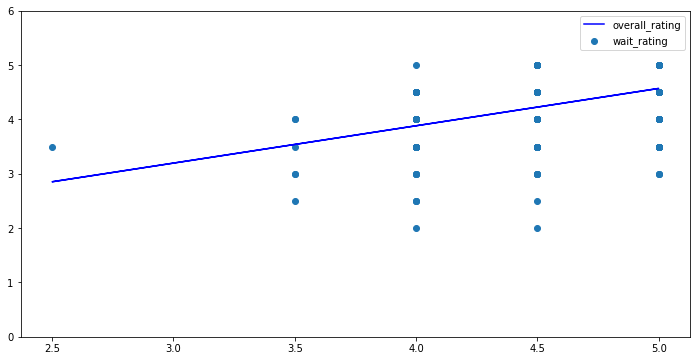

In [578]:
plt.figure(figsize = (12,6))
plt.scatter(regression_df['overall_rating'], regression_df['wait_rating'])
plt.ylim(0, 6)
#plt.xlim(3.5,4.5)
linregress(regression_df['overall_rating'], regression_df['wait_rating'])


f = lambda x: 0.68673397753961996*x +1.1350546196511413
# x values of line to plot
x = regression_df['overall_rating']
# plot fit
plt.plot(x,f(x), c="blue")
#sns.stripplot(x='species', y='petal_length', data=iris, jitter=True, 
             # edgecolor='none')
#better take min and max of x values
#
plt.legend()
plt.show()

In [500]:
type(zoc_df3['bedside_rating'][157])
#zoc_df3.bedside_rating.dtype

numpy.float64

In [433]:
df_zoc= pd.DataFrame(columns = ['language','board_certs','doctor','doctor_type','education','gender', \
                                'overall_patient_ratings','practice','city_state','zoc_awards','wait_rating','bedside_rating','boro']

def languageRemap(row):
    global zoclangcomplete_df
    d = {}
    languages = row['languages'].split(',')
    n = len(languages)
    d['language'] = languages
    d['board_certs'] = [row['board_certs']] * n
    d['doctor'] = [row['doctor']] * n
    d['doctor_type'] = [row['doctor_type']] * n
    d['education'] = [row['education']] * n
    d['gender'] = [row['gender']] * n
    d['npi'] = [row['npi']] * n
    d['gender'] = [row['gender']] * n
    d['overall_patient_ratings'] = [row['overall_patient_ratings']] * n
    d['practice'] = [row['street_address']] * n
    d['city_state'] = [row['city_state']] * n
    d['zoc_awards'] = [row['zoc_awards']] * n
    d['wait_rating'] = [row['wait_rating']] * n
    d['bedside_rating'] = [row['bedside_rating']] * n
    d['boro'] = [row['boro']] * n

    df_zoc = df_zoc.append(pd.DataFrame(d), ignore_index = True)

zoclangcomplete_df.apply(languageRemap, axis = 1)
#df_genre['year'] = df_genre['year'].astype(np.int16)



#df_clean.apply(genreRemap, axis = 1)
#df_genre['year'] = df_genre['year'].astype(np.int16)

SyntaxError: invalid syntax (<ipython-input-433-c772089da589>, line 3)

In [319]:
zoclangcomplete_df

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro
157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,"Barbara L. Tint, PhD","841 Broadway,, ,(between 13th and 14th st) Sui...","New York,NY,10003",NaN,4.5,4.5,1.0,NaN,Manhattan
159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,Richard Horowitz,"31 Washington Square West,, ,Penthouse E,305 W...","New York,NY,10011,New York,NY,10019","[icon-speedy-response, icon-scheduling-hero]",5.0,4.5,2.0,2.0,Manhattan
161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,Lawrence Birnbach,"840 Post Road East,80 East 11th Street,, ,Suit...","Westport,CT,06880,New York,NY,10003,New York,N...",[icon-scheduling-hero],5.0,5.0,1.0,1.0,Manhattan
162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,"Mona Nicolae, MD.","280 Madison Ave,, ,Suite 311,3 Beechwood Rd,, ...","New York,NY,10016,Summit,NJ,07901","[icon-see-you-again, icon-speedy-response, ico...",5.0,5.0,3.0,3.0,New Jersey
165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,Gotham Medical Associates,"535 5th Ave,, ,611,123 William Street,, ,15th ...","New York,NY,10017,New York,NY,10038","[icon-see-you-again, icon-rapid-registration, ...",4.5,5.0,2.0,3.0,Manhattan
166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,Central Ave Dental,"139 North Central Avenue,, ,Suite 3,225 Broadw...","Valley Stream,NY,11580,New York,NY,10007","[icon-see-you-again, icon-speedy-response]",4.5,5.0,2.0,2.0,Manhattan
169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,Complete Neurological Care,"112-47 Queens Blvd,, ,Suite 206,225 Broadway,,...","Forest Hills,NY,11375,New York,NY,10007,Bronx,...","[icon-see-you-again, icon-rapid-registration, ...",4.5,4.5,1.0,3.0,Brooklyn
170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,Mott Women Healthcare PLLC,"128 Mott Street,, ,Suite 501,849 57th Street,,...","New York,NY,10013,Brooklyn,NY,11220","[icon-see-you-again, icon-rapid-registration, ...",3.0,4.5,2.0,3.0,Brooklyn
171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,C.S. Leung Rehabilitation Medicine,19 Bowery,"New York,NY,10002","[icon-see-you-again, icon-speedy-response]",5.0,5.0,3.0,2.0,Manhattan
173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,Acuiderm Cosmetic Laser Center,"136-20 38th Ave,, ,Suite 5H,6402 8th Ave,, ,Su...","Flushing,NY,11354,Brooklyn,NY,11220,New York,N...","[icon-see-you-again, icon-rapid-registration, ...",5.0,5.0,3.0,3.0,Brooklyn


In [327]:
#zoclangcomplete_df=zoclangcomplete_df.reset_index().set_index(['doctor','languages'])

In [570]:
zoclangcomplete2_df

,doctor,languages
0,"Abby Fashakin, FNP, MSN",English
1,"Abby Fashakin, FNP, MSN",Yoruba
2,"Allison Gill, PT",English
3,"Amir Rand, PT, DPT",English
4,"Andrew Eisen, DPT",English
5,"Angela M Godwin, NP",English
6,"Anthony Freire, LMHC",English
7,"Anthony Freire, LMHC",Portuguese
8,"Ashton Frulla, NP",English
9,"Barbara Tint, LCSW, PhD",English


In [805]:
merged_zoclang2_df=pd.merge(zoclangcomplete2_df, zoc_df3, how='left', on ='doctor').dropna()
merged_zoclang2_df

,doctor,languages_x,index,board_certs,doctor_type,education,gender,languages_y,npi,overall_patient_ratings,...,wait_rating,bedside_rating,lang_len,awards_len,boro,gender2,boro2,dr_class,boro_count,Overall_rating_percents
6,"Dr. A. Joshua Zimm, MD",Spanish,3093,"Flushing Hospital Medical Center,Jamaica Hospi...","Facial Plastic & Reconstructive Surgeon, Ear, ...",NewYork-Presbyterian Hospital / Weill Cornell ...,Male,"[English, Spanish]",1.013075e+09,"5,5,5",...,5.0,5.0,2.0,1.0,Manhattan,2,1,"Ear, Nose, & Throat Doctor",652,0.766871
9,"Dr. Abe Shahim, MD",Farsi,997,Lenox Hill Hospital,OB-GYN,"Columbia University (Bachelor’s),Lenox Hill Ho...",Male,"[English, Farsi, French, Spanish]",1.083660e+09,"5,4.5,5",...,4.5,5.0,4.0,2.0,Manhattan,2,1,OB-GYN,652,0.766871
10,"Dr. Abe Shahim, MD",French,997,Lenox Hill Hospital,OB-GYN,"Columbia University (Bachelor’s),Lenox Hill Ho...",Male,"[English, Farsi, French, Spanish]",1.083660e+09,"5,4.5,5",...,4.5,5.0,4.0,2.0,Manhattan,2,1,OB-GYN,652,0.766871
11,"Dr. Abe Shahim, MD",Spanish,997,Lenox Hill Hospital,OB-GYN,"Columbia University (Bachelor’s),Lenox Hill Ho...",Male,"[English, Farsi, French, Spanish]",1.083660e+09,"5,4.5,5",...,4.5,5.0,4.0,2.0,Manhattan,2,1,OB-GYN,652,0.766871
12,"Dr. Abraham Demoz, MD",Arabic,588,"Kings County Hospital Center,Kingsbrook Jewish...",Primary Care Doctor,"Medical School - Addis Ababa University, Colle...",Male,"[English, Arabic, Amharic, French, Tigrinya]",1.326110e+09,"5,4.5,5",...,4.5,5.0,5.0,3.0,Brooklyn,2,2,Primary Care Doctor,265,1.886792
13,"Dr. Abraham Demoz, MD",Arabic,833,"Kings County Hospital Center,Kingsbrook Jewish...",Primary Care Doctor,"Medical School - Addis Ababa University, Colle...",Male,"[English, Arabic, Amharic, French, Tigrinya]",1.326110e+09,"5,4.5,5",...,4.5,5.0,5.0,3.0,Brooklyn,2,2,Primary Care Doctor,265,1.886792
14,"Dr. Abraham Demoz, MD",Amharic,588,"Kings County Hospital Center,Kingsbrook Jewish...",Primary Care Doctor,"Medical School - Addis Ababa University, Colle...",Male,"[English, Arabic, Amharic, French, Tigrinya]",1.326110e+09,"5,4.5,5",...,4.5,5.0,5.0,3.0,Brooklyn,2,2,Primary Care Doctor,265,1.886792
15,"Dr. Abraham Demoz, MD",Amharic,833,"Kings County Hospital Center,Kingsbrook Jewish...",Primary Care Doctor,"Medical School - Addis Ababa University, Colle...",Male,"[English, Arabic, Amharic, French, Tigrinya]",1.326110e+09,"5,4.5,5",...,4.5,5.0,5.0,3.0,Brooklyn,2,2,Primary Care Doctor,265,1.886792
16,"Dr. Abraham Demoz, MD",French,588,"Kings County Hospital Center,Kingsbrook Jewish...",Primary Care Doctor,"Medical School - Addis Ababa University, Colle...",Male,"[English, Arabic, Amharic, French, Tigrinya]",1.326110e+09,"5,4.5,5",...,4.5,5.0,5.0,3.0,Brooklyn,2,2,Primary Care Doctor,265,1.886792
17,"Dr. Abraham Demoz, MD",French,833,"Kings County Hospital Center,Kingsbrook Jewish...",Primary Care Doctor,"Medical School - Addis Ababa University, Colle...",Male,"[English, Arabic, Amharic, French, Tigrinya]",1.326110e+09,"5,4.5,5",...,4.5,5.0,5.0,3.0,Brooklyn,2,2,Primary Care Doctor,265,1.886792


Text(0,0.5,'Number of Languages')

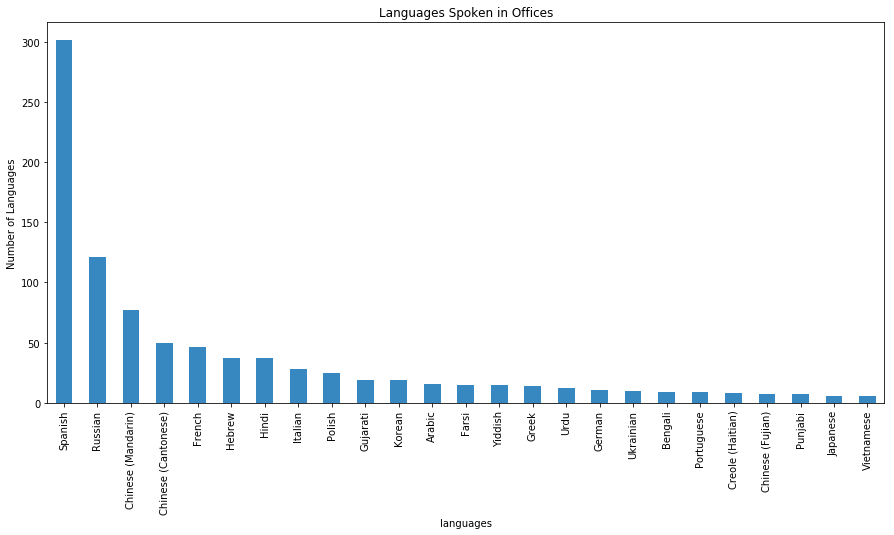

In [687]:
from matplotlib.colors import ListedColormap
#zoclangcomplete2_df.groupby('languages')['languages'].count().plot.bar()
plot5 = zoclangcomplete2_df.groupby('languages')['languages'].count().nlargest(25).plot(kind='bar', \
               title='Languages Spoken in Offices', figsize=(15,7),\
               colormap=ListedColormap(sns.color_palette("Blues_r", 2)),  )
plot5.set_ylabel('Number of Languages')


#from matplotlib.colors import ListedColormap
#df.set_index('App')\
#  .reindex_axis(df.set_index('App').sum().sort_values().index, axis=1)\
#  .T.plot(kind='bar', stacked=True,
#          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
#          figsize=(12,6))


In [564]:
zoclangcomplete2_df.groupby('languages').count()

,doctor
languages,
Albanian,1
Amharic,1
Arabic,16
Armenian,1
Bengali,9
Bulgarian,1
Burmese,4
Chinese (Cantonese),50
Chinese (Fujian),7


In [806]:
#zoc_df3[zoc_df3.languages.isnull()==True]   this is where the languages are null
zoc_df3

,index,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,...,wait_rating,bedside_rating,lang_len,awards_len,boro,gender2,boro2,dr_class,boro_count,Overall_rating_percents
0,157,NaN,"Barbara Tint, LCSW, PhD",Psychotherapist,"Alliant International University, PhD in Behav...",Female,[English],1.740342e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,NaN,Manhattan,1,1,Psychotherapist,652,0.690184
1,159,NaN,"Richard Horowitz, LCSW",Psychotherapist,"New York University, Master of Social Work",Male,"[English, French]",1.356435e+09,"4.5,5,4.5",4.5,...,5.0,4.5,2.0,2.0,Manhattan,2,1,Psychotherapist,652,0.690184
2,161,NaN,"Lawrence Birnbach, PhD",Psychologist,"New York University (PhD),New York University ...",Male,[English],1.972810e+09,"5,5,5",5.0,...,5.0,5.0,1.0,1.0,Manhattan,2,1,Psychologist,652,0.766871
3,162,NaN,"Dr. Mona Nicolae, MD","Child and Adolescent Psychiatrist, Psychiatrist","Columbia University (Psychoanalysis),Cornell U...",Female,"[English, French, Romanian]",1.679517e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,New Jersey,1,6,Psychiatrist,105,4.761905
4,165,New York University Elaine A. and Kenneth G. L...,"Dr. Daniel L. Motola, MD, PhD","Gastroenterologist, Internist","The Mount Sinai Hospital, Residency in Interna...",Male,"[English, Spanish]",1.245500e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,3.0,Manhattan,2,1,Internist,652,0.766871
5,166,NaN,"Dr. Igor Ilyabayev, DDS","Dentist, Cosmetic Dentist","Dental School - New York University, Doctor of...",Male,"[English, Russian]",1.013188e+09,"5,4.5,5",5.0,...,4.5,5.0,2.0,2.0,Manhattan,2,1,Dental,652,0.766871
6,169,"American Board of Psychiatry and Neurology,Cli...","Dr. Thomas Hoang, MD",Neurologist,"Medical School - Drexel University, Doctor of ...",Male,[English],1.912091e+09,"4.5,4.5,4.5",4.5,...,4.5,4.5,1.0,3.0,Brooklyn,2,2,Neurologist,265,1.698113
7,170,American Board of Obstetrics and Gynecology,"Dr. Angie Li, MD",OB-GYN,"Medical School - University of Texas, San Anto...",Female,"[Chinese (Mandarin), English]",1.174888e+09,"4,3,4.5",4.0,...,3.0,4.5,2.0,3.0,Brooklyn,1,2,OB-GYN,265,1.509434
8,171,The Mount Sinai Hospital,"Dr. Jonathan Leung, DO","Physiatrist, Acupuncturist",Medical School - New York Institute of Technol...,Male,"[Chinese (Cantonese), Chinese (Mandarin), Engl...",1.780711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,2.0,Manhattan,2,1,Physiatrist,652,0.766871
9,173,NaN,"Maggie Jiang, FNP, NP","Family Nurse Practitioner, Nurse Practitioner","Pace University, Master's in Family Nursing,St...",Female,"[Chinese (Mandarin), Chinese (Wenzhounese), En...",1.649711e+09,"5,5,5",5.0,...,5.0,5.0,3.0,3.0,Brooklyn,1,2,Primary Care Doctor,265,1.886792


In [807]:
#g = sns.factorplot(x="gender", col="gender", data=zoc_df3, kind="sum", size=8, aspect=.9, palette=sns.color_palette("GnBu"))
#g.set_xticklabels(rotation=90)
zoc_df3.awards_len.mean()

2.4262144821264893

In [235]:
zoc_df3.groupby('boro')[['overall_rating','wait_rating','bedside_rating']].agg(['mean','std','min','max'])


overall_rating                     wait_rating                 \
                        mean       std  min  max        mean       std  min   
boro                                                                          
Bronx               4.833333  0.288675  4.0  5.0    4.190476  0.402374  3.5   
Brooklyn            4.684906  0.358551  3.5  5.0    4.184906  0.550274  2.0   
Manhattan           4.816718  0.280847  2.5  5.0    4.550000  0.382847  3.0   
New Jersey          4.719048  0.324658  4.0  5.0    4.317308  0.446441  3.0   
Queens              4.721429  0.367480  3.5  5.0    4.200000  0.586070  2.0   
Staten Island       4.750000  0.462910  4.0  5.0    4.187500  0.593867  3.0   

                   bedside_rating                      
               max           mean       std  min  max  
boro                                                   
Bronx          5.0       4.809524  0.294796  4.0  5.0  
Brooklyn       5.0       4.692453  0.380315  3.5  5.0  
Manhattan      5.0       4.832308  0.275394  3.5  5.0  
New Jersey     5.0       4.706731  0.338548  3.5  5.0  
Queens         5.0       4.700000  0.393792  3.5  5.0  
Staten Island  5.0       4.750000  0.462910  4.0  5.0

In [236]:
zoc_df3.groupby('boro')[['lang_len']].agg(['mean','std','min','max'])

lang_len                    
                   mean       std  min  max
boro                                       
Bronx          2.047619  1.203170  1.0  4.0
Brooklyn       2.238636  1.310916  1.0  5.0
Manhattan      1.767692  1.005318  1.0  5.0
New Jersey     2.086538  1.158427  1.0  5.0
Queens         2.028571  0.977596  1.0  5.0
Staten Island  1.750000  0.886405  1.0  3.0

In [247]:
zoc_df3.groupby(['boro','gender'])[['gender']].agg(['count'])

gender
                      count
boro          gender       
Bronx         Female     11
              Male       10
Brooklyn      Female    100
              Male      165
Manhattan     Female    281
              Male      371
New Jersey    Female     32
              Male       73
Queens        Female     25
              Male       45
Staten Island Female      2
              Male        6

In [803]:
#from collections import Counter
#Counter(zoc_df3.doctor_type)

In [801]:
#Counter(zoc_df3.education)

In [802]:
#Counter(zoc_df3.board_certs)

In [232]:
#zoc_df3[pd.isnull(zoc_df3.boro)] when checking rows for nulls 

,board_certs,doctor,doctor_type,education,gender,languages,npi,overall_patient_ratings,overall_rating,practice,street_address,city_state,zoc_awards,wait_rating,bedside_rating,lang_len,awards_len,boro


In [622]:
drtype_gender_df=zoc_df3.groupby(['dr_class', 'gender'])[['dr_class']].agg("count")
#zoc_df3.groupby(['boro','gender'])[['gender']].agg(['count'])
#zoclangcomplete2_df.groupby('languages')['languages'].count().nlargest(25).plot(kind='bar', \
               #title='Languages Spoken in Offices', \
               #colormap='summer',  )
        
drtype_gender_df

dr_class
dr_class                   gender          
Cardiologist               Female         6
                           Male          19
Chiropractor               Female        12
                           Male          42
Dental                     Female        22
                           Male          26
Dermatologist              Female        26
                           Male          12
Ear, Nose, & Throat Doctor Female        11
                           Male          47
Eye Treatment              Female       105
                           Male         160
Gastroenterologist         Female         9
                           Male          27
Internist                  Female        39
                           Male          58
Misc                       Female         5
                           Male          11
Neurologist                Female         5
                           Male           8
Nurse Practitioner         Female         9
                           Male           2
OB-GYN                     Female        34
                           Male          18
Oncologist                 Female         8
                           Male           6
Physiatrist                Female         4
                           Male          11
Physical Therapist         Female        16
                           Male           9
Podiatrist                 Female         8
                           Male          10
Primary Care Doctor        Female        93
                           Male          61
Psychiatrist               Female         9
                           Male          31
Psychologist               Female         4
                           Male           6
Psychotherapist            Female        10
                           Male           8
Radiologist                Male           5
Surgeon                    Female         6
                           Male          65
Urgent Care                Female        10
                           Male          28

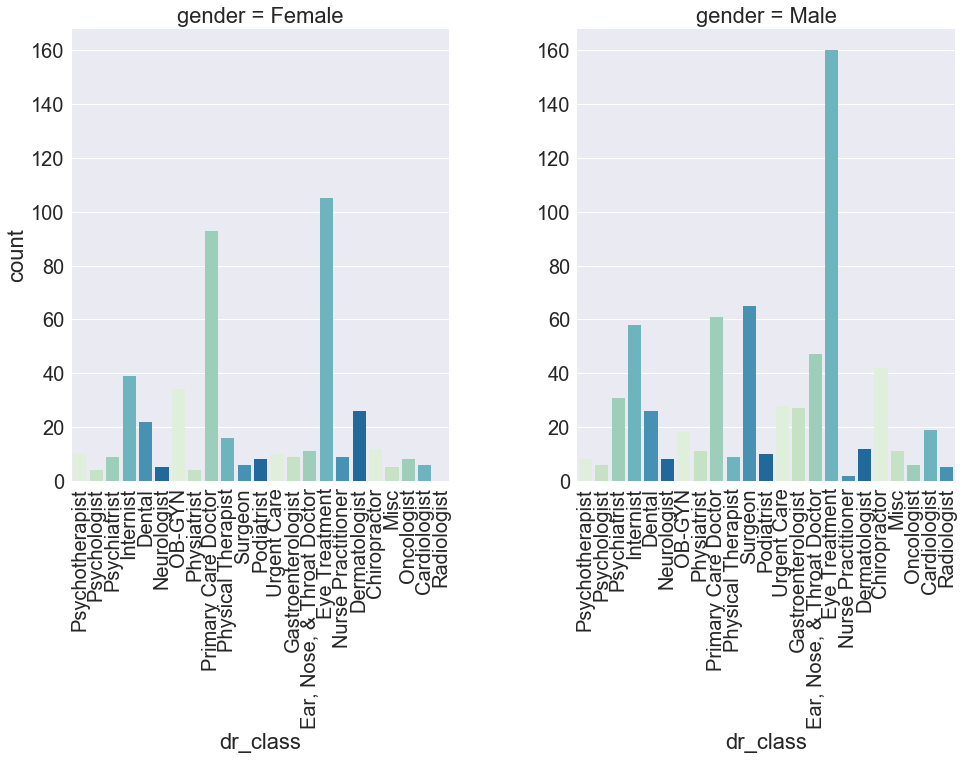

In [812]:
#Doctor type by gender 
g = sns.factorplot(x="dr_class", col="gender", data=zoc_df3, kind="count", size=8, aspect=.9, palette=sns.color_palette("GnBu"))
g.set_xticklabels(rotation=90)

In [718]:

overall_rating_percents



overall_rating
overall_rating boro          boro_count                
2.5            Manhattan     652                      1
3.5            Brooklyn      265                      3
               Manhattan     652                      1
               Queens        70                       2
4.0            Bronx         21                       1
               Brooklyn      265                     28
               Manhattan     652                     14
               New Jersey    105                      9
               Queens        70                       4
               Staten Island 8                        2
4.5            Bronx         21                       5
               Brooklyn      265                    102
               Manhattan     652                    203
               New Jersey    105                     41
               Queens        70                      25
5.0            Bronx         21                      15
               Brooklyn      265                    132
               Manhattan     652                    433
               New Jersey    105                     55
               Queens        70                      39
               Staten Island 8                        6

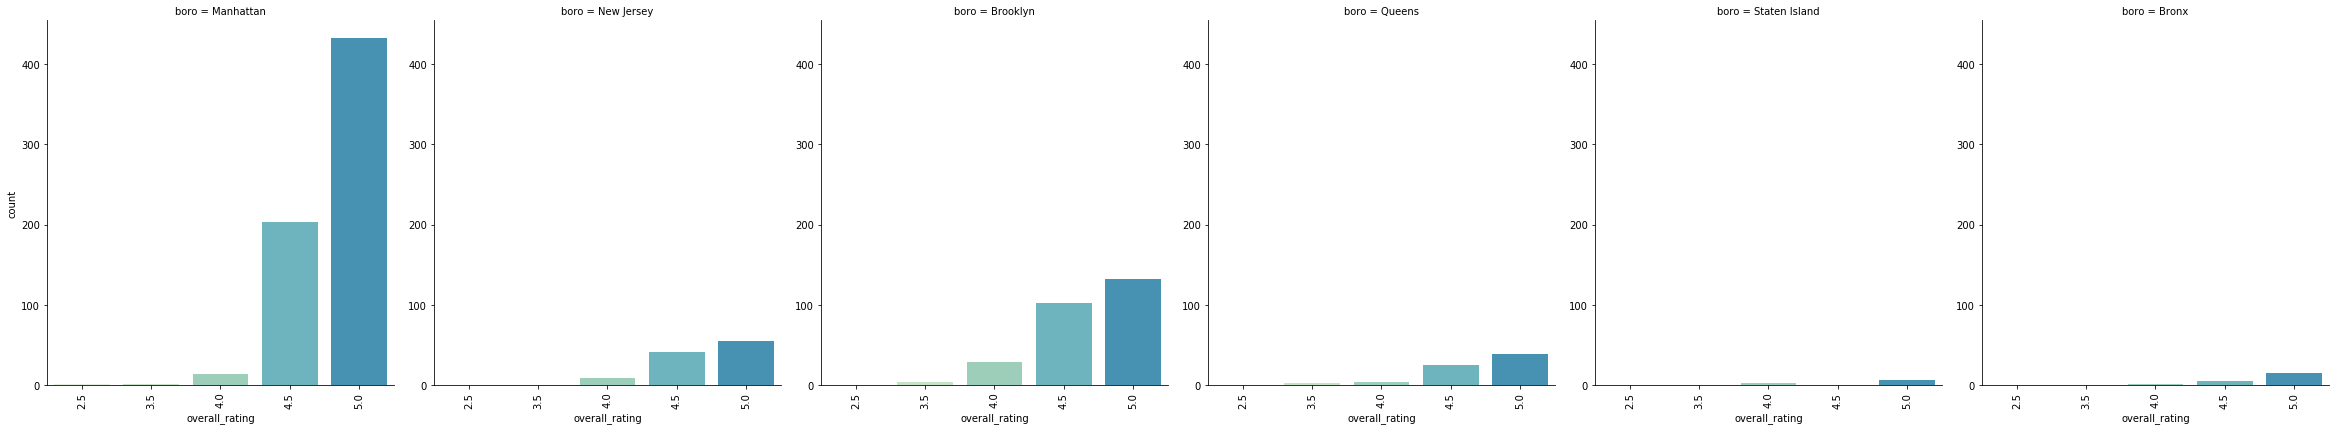

In [720]:
h = sns.factorplot(x="overall_rating", col="boro", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

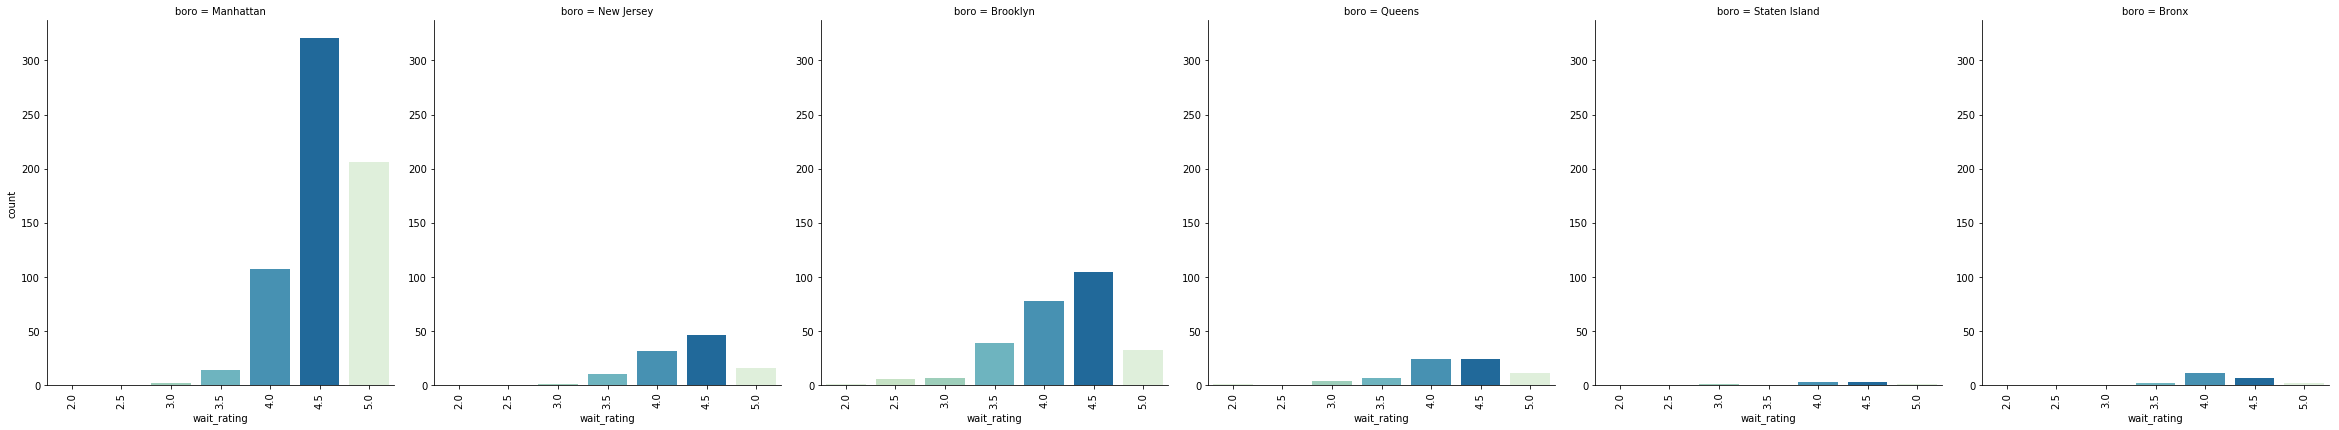

In [693]:
h = sns.factorplot(x="wait_rating", col="boro", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

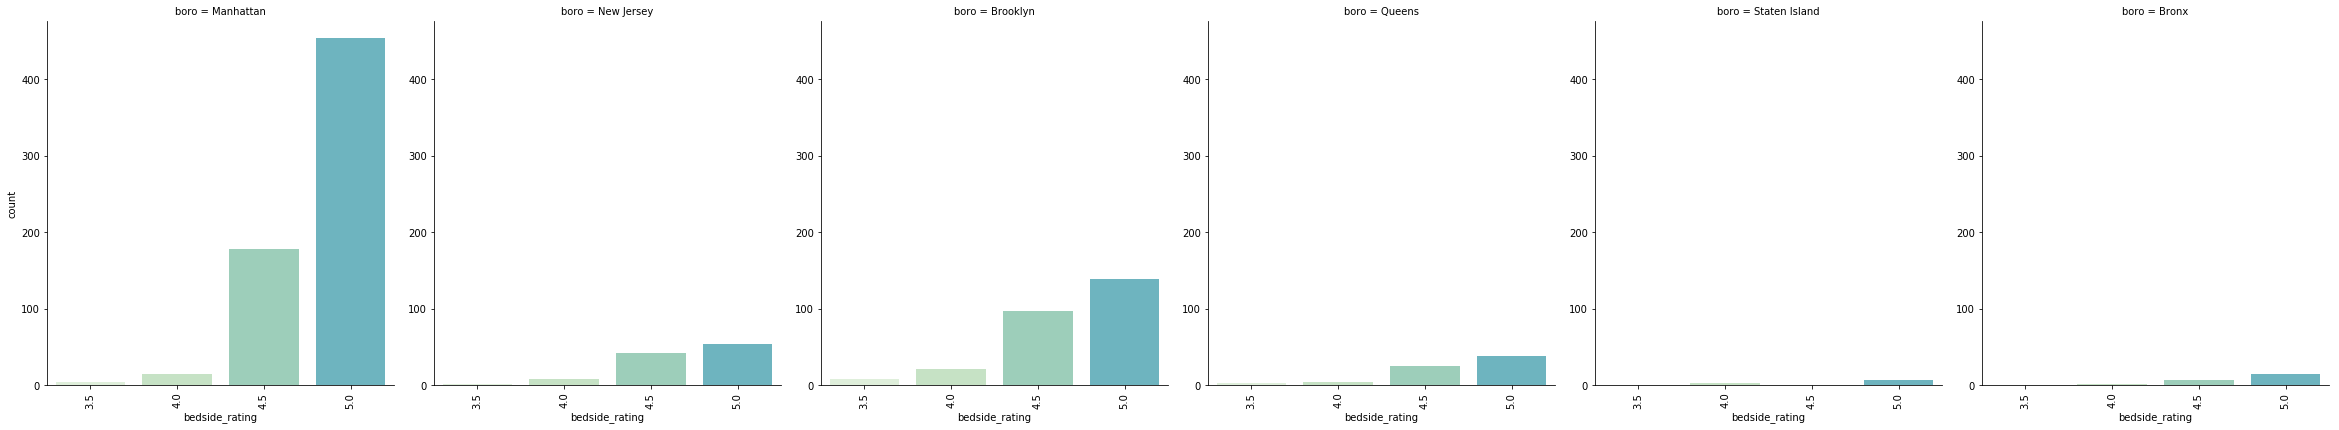

In [694]:
h = sns.factorplot(x="bedside_rating", col="boro", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

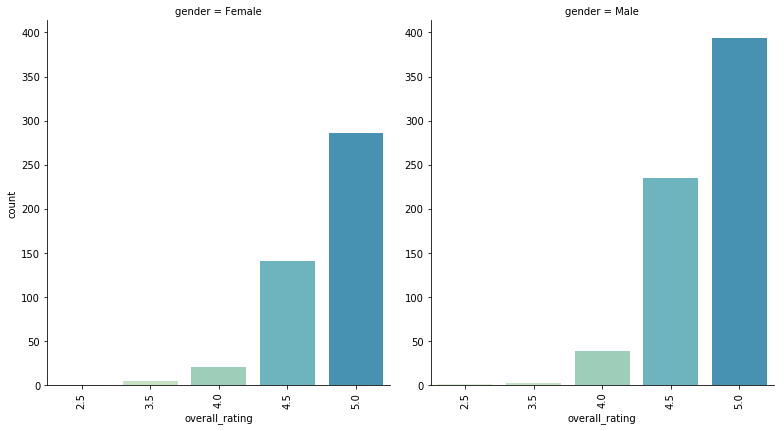

In [690]:
h = sns.factorplot(x="overall_rating", col="gender", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

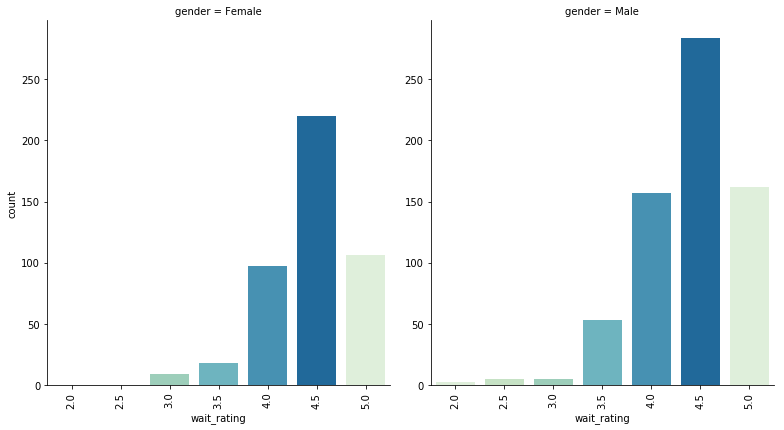

In [691]:
h = sns.factorplot(x="wait_rating", col="gender", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)

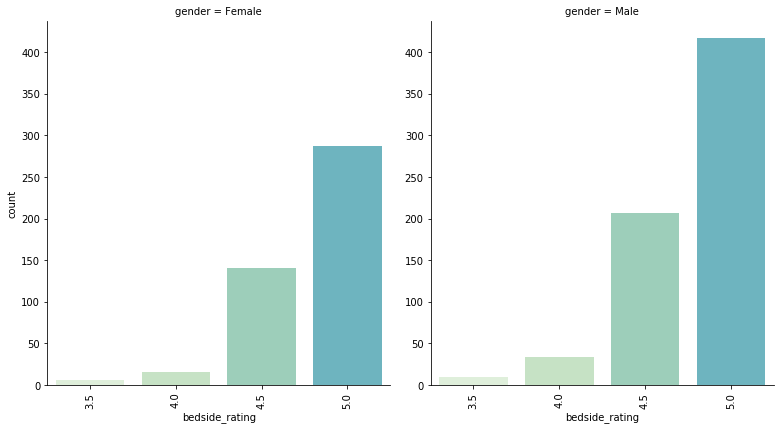

In [692]:
h = sns.factorplot(x="bedside_rating", col="gender", data=zoc_df3, kind="count", size=6, aspect=.9, palette=sns.color_palette("GnBu"))
h.set_xticklabels(rotation=90)